# ***SEISMIC HAZARD PREDICTION USING MACHINE LEARNING***

# **I. INTRODUCTION**

Hello! Welcome to my Notebook.

Notebook ini merupakan bagian dari tugas *Milestone 2* yang dibuat oleh **Asta Zeska Dimitri** dari Batch **001-HCK**.

## I.1. Background

Aktivitas pertambangan tentu tidak lepas dari resiko atau bahaya yang dapat terjadi kapan saja. Terlebih untuk tambang bawah tanah, proses penggaliannya bisa menyebabkan lapisan tanah di sekitarnya menjadi tidak stabil. Oleh karena itu tambang bawah tanah rentan terhadap bencana seismik, salah satu contoh dari bencana seismik adalah runtuhnya lapisan tanah dan batuan akibat proses penggalian atau biasa dikenal dengan istilah rockburst. Untuk pencegahannya perusahaan tambang memasang beberapa alat rekam gelombang seismik atau yang biasa disebut dengan geophone di beberapa lokasi penggalian agar jika muncul gelombang seismik akibat adanya pergerakan tanah bisa diketahui dan dilakukan evakuasi para pekerja yang berada pada lokasi-lokasi yang rentan bahaya.

Dengan bantuan teknologi machine learning, data rekaman geophone yang didapatkan bisa diolah lebih lanjut untuk dipelajari karakteristik dan behaviournya sehingga bisa dilakukan prediksi apakah gelombang seismik yang terekam ini berpeluang menimbulkan bahaya atau tidak. Dan ini akan membantu perusahaan dalam menjaga bahkan meningkatkan standar Health, Safety, and Environment (HSE) perusahaan.

## I.2. Objective

Untuk menjaga standar 'Zero Accident', perusahaan ingin menggunakan machine learning untuk melakukan prediksi kemungkinan munculnya bencana seismik pada lokasi tambang bawah tanah mereka dengan menggunakan data rekaman geophone yang sudah dipasang. Dan hasil dari prediksi ini nantinya akan digunakan sebagai upaya pencegahan bahaya dan indikator perlu atau tidaknya para pekerja melakukan evakuasi.

## I.3 Data

Untuk data yang digunakan kali ini adalah data 'seismic-bumps Data Set' yang didapatkan dari UCI Machine Learning Repository. Data bisa didapatkan melalui link `https://archive.ics.uci.edu/ml/datasets/seismic-bumps`.

Dan berikut adalah informasi dari masing-masing kolom untuk memudahkan proses analisis kedepannya:
1. seismic: result of shift seismic hazard assessment in the mine working obtained by the seismic
method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state).
2. seismoacoustic: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method.
3. shift: information about type of a shift (W - coal-getting, N -preparation shift).
4. genergy: seismic energy recorded within previous shift by the most active geophone (GMax) out of
geophones monitoring the longwall.
5. gpuls: a number of pulses recorded within previous shift by GMax.
6. gdenergy: a deviation of energy recorded within previous shift by GMax from average energy recorded
during eight previous shifts.
7. gdpuls: a deviation of a number of pulses recorded within previous shift by GMax from average number
of pulses recorded during eight previous shifts.
8. hazard: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method based on registration coming form GMax only.
9. nbumps: the number of seismic bumps recorded within previous shift.
10. nbumps2: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift.
11. nbumps3: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift.
12. nbumps4: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift.
13. nbumps5: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift.
14. nbumps6: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift.
15. nbumps7: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift.
16. nbumps89: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift.
17. energy: total energy of seismic bumps registered within previous shift.
18. maxenergy: the maximum energy of the seismic bumps registered within previous shift.
19. class: the decision attribute - '1' means that high energy seismic bump occurred in the next shift
('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift
('non-hazardous state').

# **II. IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from warnings import simplefilter

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.exceptions import ConvergenceWarning

from imblearn.over_sampling import RandomOverSampler

from feature_engine.outliers import Winsorizer 

# **III. DATA LOADING & OVERVIEW**

In [2]:
df = pd.read_csv('seismic-bumps.csv')

In [3]:
df.head(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
5,a,a,W,63760,195,-73,-65,a,0,0,0,0,0,0,0,0,0,0,0
6,a,a,W,207930,614,-6,18,a,2,2,0,0,0,0,0,0,1000,700,0
7,a,a,N,48990,194,-27,-3,a,1,0,1,0,0,0,0,0,4000,4000,0
8,a,a,N,100190,303,54,52,a,0,0,0,0,0,0,0,0,0,0,0
9,a,a,W,247620,675,4,25,a,1,1,0,0,0,0,0,0,500,500,0


In [390]:
df.tail(3)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0
2583,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0,0,0,0


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   hazard          2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [392]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
genergy,2584.0,90242.523220,229200.508894,100.0,11660.0,25485.0,52832.50,2595650.0
gpuls,2584.0,538.579334,562.652536,2.0,190.0,379.0,669.00,4518.0
gdenergy,2584.0,12.375774,80.319051,-96.0,-37.0,-6.0,38.00,1245.0
gdpuls,2584.0,4.508901,63.166556,-96.0,-36.0,-6.0,30.25,838.0
nbumps,2584.0,0.859520,1.364616,0.0,0.0,0.0,1.00,9.0
nbumps2,2584.0,0.393576,0.783772,0.0,0.0,0.0,1.00,8.0
nbumps3,2584.0,0.392802,0.769710,0.0,0.0,0.0,1.00,7.0
nbumps4,2584.0,0.067724,0.279059,0.0,0.0,0.0,0.00,3.0
nbumps5,2584.0,0.004644,0.068001,0.0,0.0,0.0,0.00,1.0
nbumps6,2584.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


Tidak ditemukan missing value pada data. Dari statistik deskriptif dapat terlihat kemungkinan adanya outliers berdasarkan nilai max yang sangat besar. Lalu pada kolom nbumps6, nbumps7, dan nbumps89 hanya mengandung satu nilai saja yaitu 0, penulis akan menghapus kolom ini karena tidak memberikan pengaruh untuk analisis kedepannya.

In [393]:
df.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], inplace=True)

Untuk kolom-kolom yang memiliki nilai a, b, dan c akan diganti menggunakan 0, 1, dan 2 karena sama-sama menunjukkan tingkatan atau level bahaya dan untuk memudahkan proses analisa selanjutnya.

In [394]:
df.loc[:, 'seismic'] = df.loc[:, 'seismic'].replace('a', 0)
df.loc[:, 'seismic'] = df.loc[:, 'seismic'].replace('b', 1)
df['seismic'].value_counts()

0    1682
1     902
Name: seismic, dtype: int64

In [395]:
df.loc[:, 'seismoacoustic'] = df.loc[:, 'seismoacoustic'].replace('a', 0)
df.loc[:, 'seismoacoustic'] = df.loc[:, 'seismoacoustic'].replace('b', 1)
df.loc[:, 'seismoacoustic'] = df.loc[:, 'seismoacoustic'].replace('c', 2)
df['seismoacoustic'].value_counts()

0    1580
1     956
2      48
Name: seismoacoustic, dtype: int64

In [396]:
df.loc[:, 'hazard'] = df.loc[:, 'hazard'].replace('a', 0)
df.loc[:, 'hazard'] = df.loc[:, 'hazard'].replace('b', 1)
df.loc[:, 'hazard'] = df.loc[:, 'hazard'].replace('c', 2)
df['hazard'].value_counts()

0    2342
1     212
2      30
Name: hazard, dtype: int64

In [397]:
df.loc[:, 'shift'] = df.loc[:, 'shift'].replace('N', 0)
df.loc[:, 'shift'] = df.loc[:, 'shift'].replace('W', 1)
df['shift'].value_counts()

1    1663
0     921
Name: shift, dtype: int64

# **IV. EXPLORATORY DATA ANALYSIS**

Pada section ini kita akan mencoba melakukan eksplorasi pada data yang digunakan dengan harapan ada informasi/insight yang akan membantu dalam proses analisis selanjutnya.

## IV.1. Kolom Class (Target)

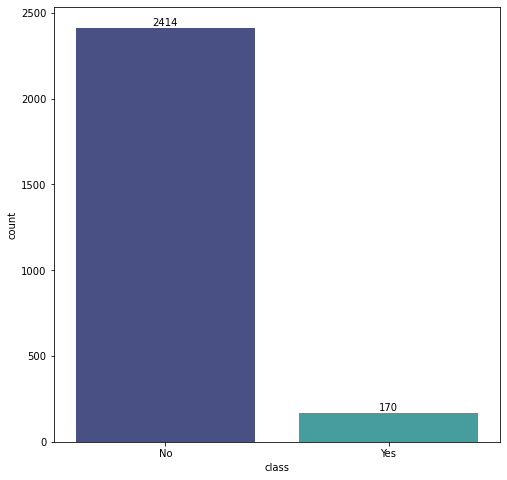

In [398]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x='class', palette='mako')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks([0,1], ['No', 'Yes']);

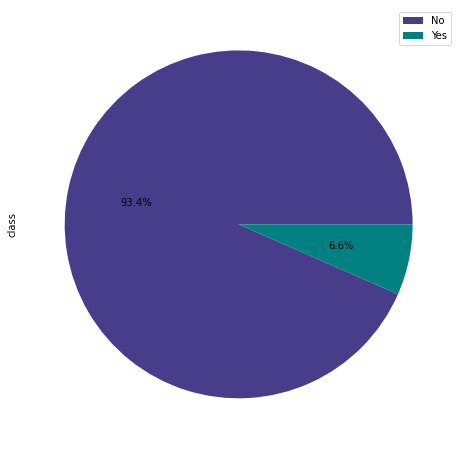

In [399]:
plt.figure(figsize=(8,8), facecolor='white')
df['class'].value_counts().plot(kind='pie', labels = ['',''], autopct='%1.1f%%', colors = ['darkslateblue','teal'])
plt.legend(labels=['No', 'Yes']);

Kolom class disini merujuk kepada kejadian bahaya/bencana yang terjadi, dimana Yes berarti ada bahaya/bencana yang terjadi dan No berarti tidak ada bahaya/bencana yang terjadi. Ketidakseimbangan pada kolom target kali ini sudah termasuk imbalance dengan proporsi No sebesar 93% dan Yes 7%.

## IV.2. Kolom Seismic

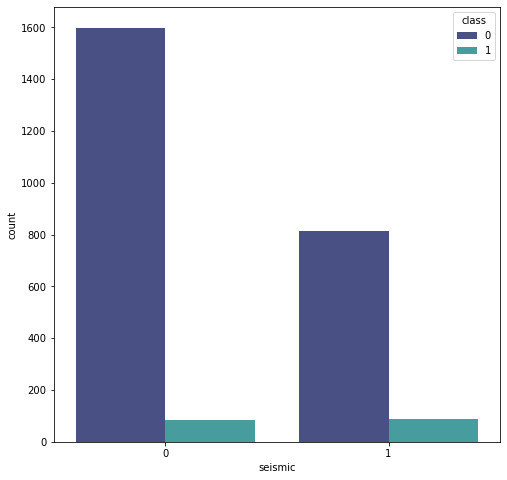

In [400]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='seismic', hue='class', palette='mako');

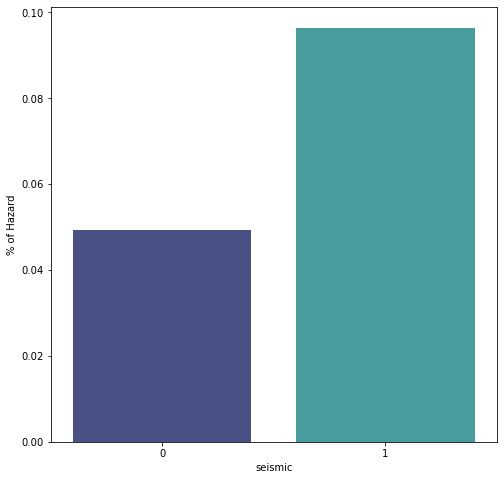

In [401]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='seismic', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Pada kolom seismic ini menjelaskan tentang asesmen bahaya yang dilakukan berdasarkan gelombang seismic atau gelombang primernya saja. Nilai 0 berarti tidak ada kejadian bahaya sama sekali dan nilai 1 berarti ada kejadian bahaya yang terjadi namun tingkatannya rendah. Dan bisa dilihat pada grafik diatas peluang bahaya kedua variabel ini masih sangat rendah hanya di 10% saja. 

## IV.3. Kolom Seismoacoustic

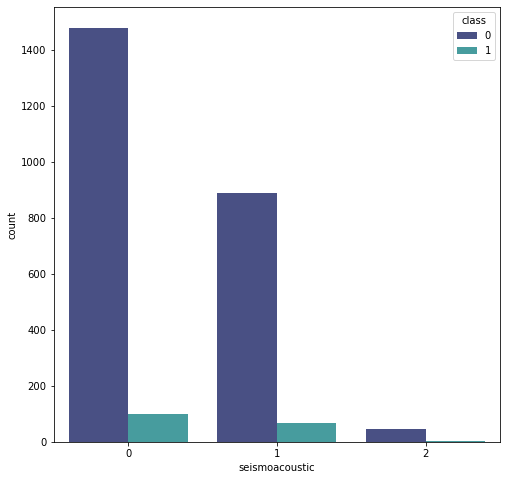

In [402]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='seismoacoustic', hue='class', palette='mako');

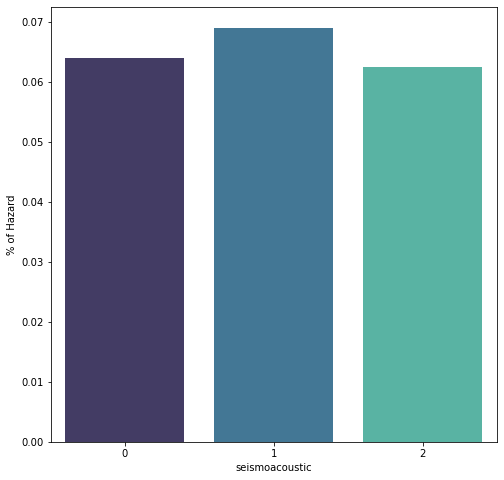

In [403]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='seismoacoustic', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Pada kolom seismoacoustic ini menjelaskan tentang asesmen bahaya yang dilakukan berdasarkan gelombang seismoacoustic-nya atau gelombang sekundernya saja. nilai 0 berarti tidak ada kejadian bahaya sama sekali, nilai 1 berarti ada kejadian bahaya yang terjadi namun tingkatannya rendah dan nilai 2 berarti ada kejadian bahaya yang terjadi dan tingkatnya tinggi. Dan bisa dilihat juga pada grafik diatas peluang bahaya dari ketiga variabel ini masih sangat rendah hanya di sekitar 6-7% saja.

## IV.4. Kolom Shift

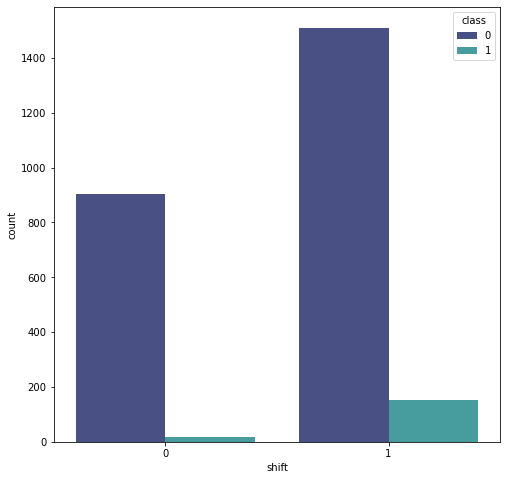

In [404]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='shift', hue='class', palette='mako');

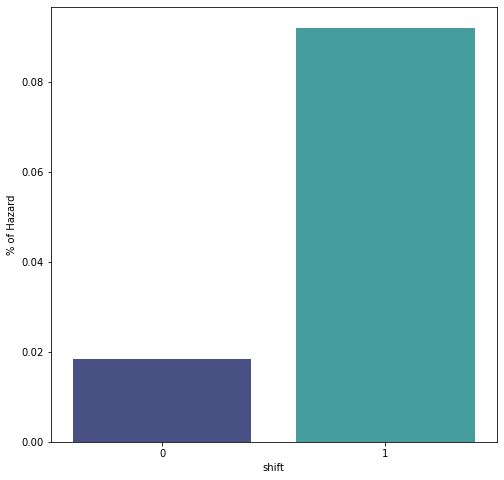

In [405]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='shift', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Kolom ini menjelaskan kegiatan apa yang lebih berpeluang menimbulkan kondisi bahaya/bencana. Dimana 0 adalah kegiatan persiapan, dan 1 adalah kegiatan menambangnya. Dapat dilihat pada grafik bahwa kegiatan menambang lebih berpotensi menimbulkan kondisi bahaya/bencana dibandingkan kegiatan persiapan. 

## IV.5. Kolom Genergy

In [406]:
df_copy = df.copy()
df_copy['genergy_range'] = pd.cut(df_copy['genergy'], [0, 25000, 50000, 100000, 200000, 500000, 3000000])
df_copy['genergy_range'].value_counts()

(0, 25000]           1272
(25000, 50000]        640
(50000, 100000]       305
(100000, 200000]      129
(500000, 3000000]     121
(200000, 500000]      117
Name: genergy_range, dtype: int64

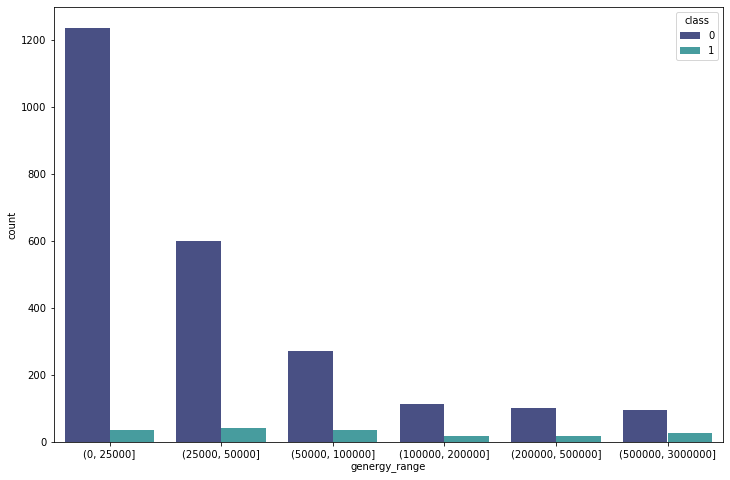

In [407]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_copy, x='genergy_range', hue='class', palette='mako');

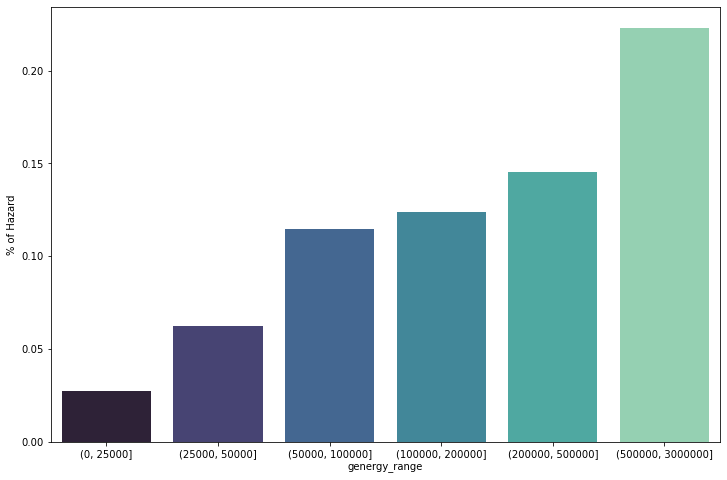

In [408]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_copy, x='genergy_range', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Kolom genergy ini menjelaskan tentang total energi seismic yang terekam oleh geophone pada satu shift. Terlihat sebuah pola bahwa semakin besar energi seismic yang terekam maka semakin tinggi juga peluang terjadinya kondisi bahaya/bencana. 

## IV.6. Kolom Gpuls

In [409]:
df_copy['gpuls_range'] = pd.cut(df_copy['gpuls'], [0, 250, 500, 1000, 2000, 5000])
df_copy['gpuls_range'].value_counts()

(0, 250]        856
(250, 500]      761
(500, 1000]     621
(1000, 2000]    259
(2000, 5000]     87
Name: gpuls_range, dtype: int64

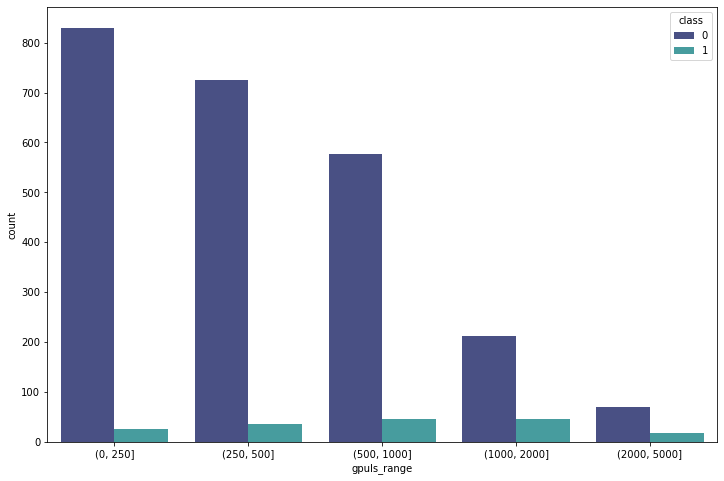

In [410]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_copy, x='gpuls_range', hue='class', palette='mako');

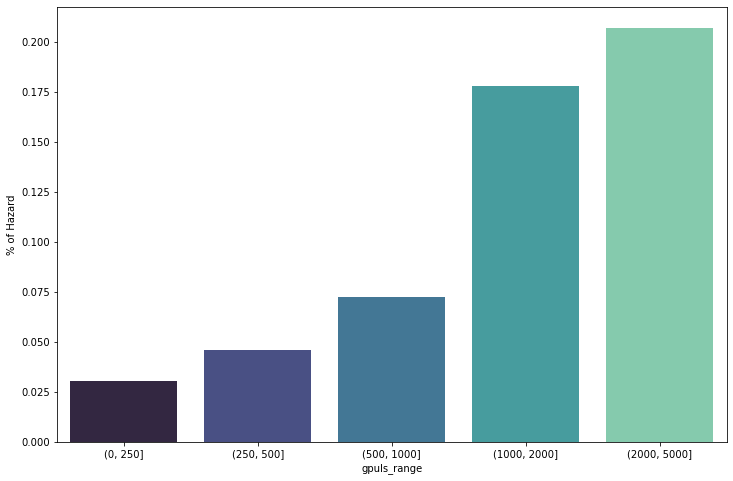

In [411]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_copy, x='gpuls_range', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Kolom gpuls ini menjelaskan seberapa banyak pulse atau denyut yang terekam oleh geophone pada satu shift. Sama seperti kolom genergy, terlihat sebuah pola dimana semakin banyak denyut yang terekam maka semakin tinggi pula peluang terjadinya kondisi bahaya/bencana.

## IV.7. Kolom Hazard

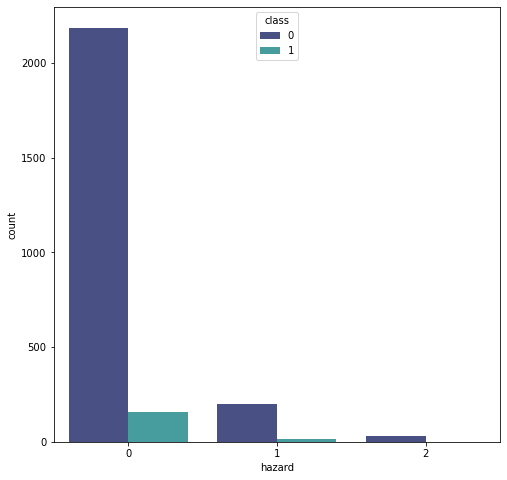

In [412]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='hazard', hue='class', palette='mako');

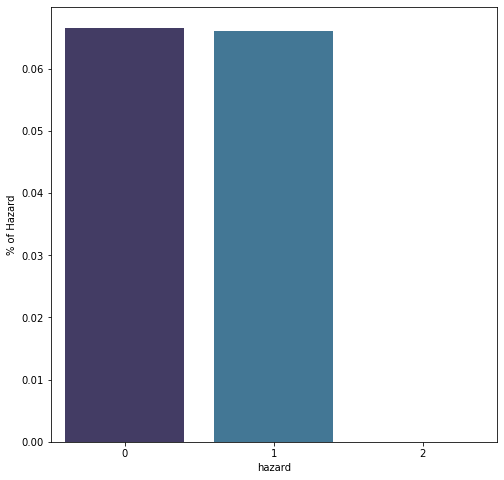

In [413]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='hazard', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Pada kolom hazard ini menjelaskan tentang asesmen bahaya yang dilakukan berdasarkan rekaman mentah langsung dari geophone. nilai 0 berarti tidak ada kejadian bahaya sama sekali, nilai 1 berarti ada kejadian bahaya yang terjadi namun tingkatannya rendah dan nilai 2 berarti ada kejadian bahaya yang terjadi dan tingkatnya tinggi. Dan bisa dilihat juga pada grafik diatas peluang bahaya dari ketiga variabel ini masih sangat rendah hanya di sekitar 6% saja.

## IV.8. Kolom Energy

In [414]:
df_copy['energy_range'] = pd.cut(df_copy['energy'], [-1, 1000, 5000, 10000, 25000, 50000, 405000])
df_copy['energy_range'].value_counts()

(-1, 1000]         1799
(1000, 5000]        392
(5000, 10000]       179
(10000, 25000]       89
(25000, 50000]       66
(50000, 405000]      59
Name: energy_range, dtype: int64

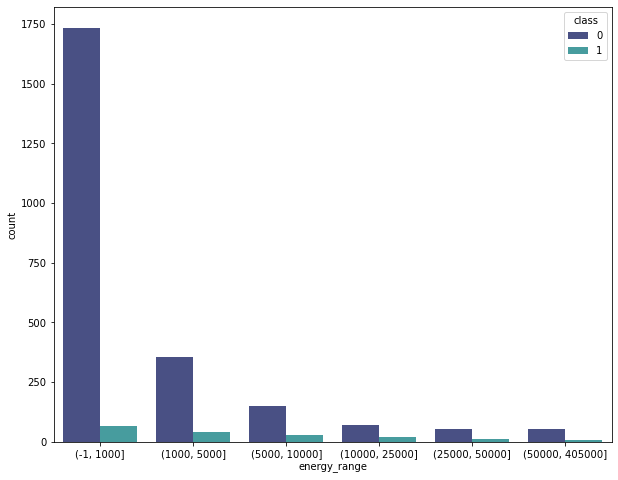

In [415]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_copy, x='energy_range', hue='class', palette='mako');

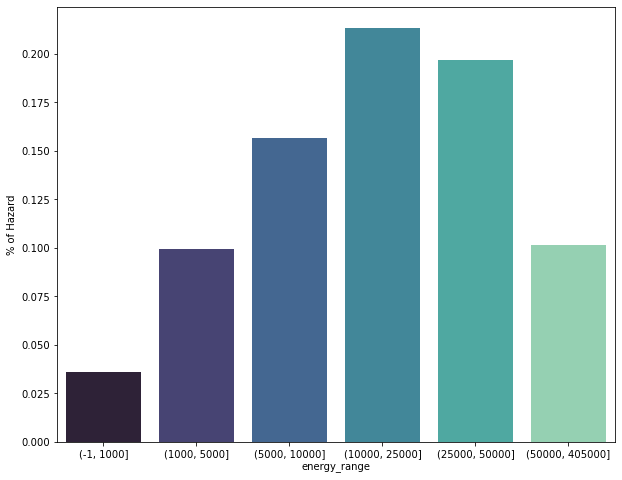

In [416]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_copy, x='energy_range', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Kolom energy ini menjelaskan tentang total energi yang terekam oleh geophone. Melihat grafik di atas ditemukan hal yang menarik yaitu peluang tertinggi terjadinya kondisi bahaya/bencana berada pada rentang energi 10000-25000, namun setelah itu kemungkinannya menjadi turun. Hal ini berbeda dengan yang didapatkan pada kolom genergy di atas.

## IV.9. Kolom Maxenergy

In [417]:
df_copy['maxenergy_range'] = pd.cut(df_copy['maxenergy'], [-1, 1000, 5000, 10000, 25000, 50000, 400000])
df_copy['maxenergy_range'].value_counts()

(-1, 1000]         1875
(1000, 5000]        396
(5000, 10000]       164
(25000, 50000]       59
(50000, 400000]      46
(10000, 25000]       44
Name: maxenergy_range, dtype: int64

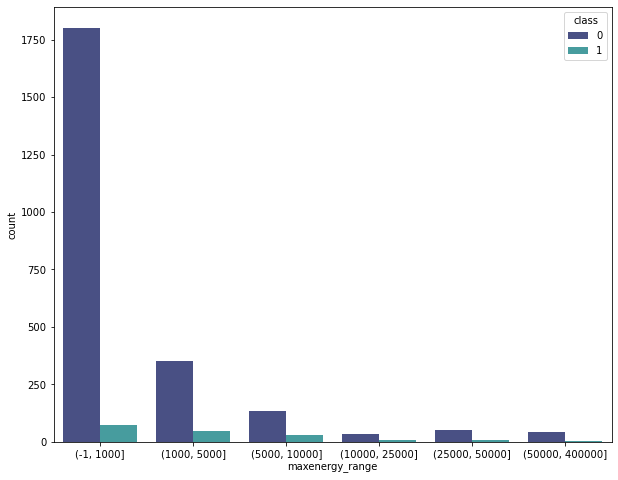

In [418]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_copy, x='maxenergy_range', hue='class', palette='mako');

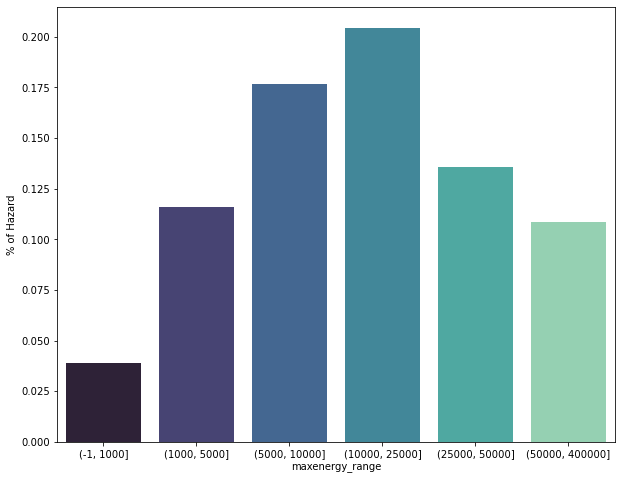

In [419]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_copy, x='maxenergy_range', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

Kolom maxenergy ini menjelaskan tentang energi maksimum yang terekam oleh geophone. Sama seperti grafik energy yang sebelumnya, ditemukan hal yang menarik yaitu peluang tertinggi terjadinya kondisi bahaya/bencana berada pada rentang energi 10000-25000, namun setelah itu kemungkinannya menjadi turun. Hal ini berbeda dengan yang didapatkan pada kolom genergy di atas.

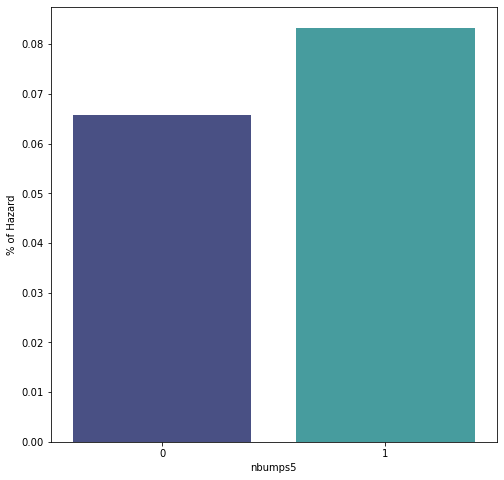

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='nbumps5', y='class', palette='mako', ci=None)
plt.ylabel('% of Hazard');

# **V. DATA PREPROCESSING**

Mengubah tipe data untuk kolom yang terlihat seperti numerik namun sebenarnya kategorikal. Ini akan memudahkan penulis dalam proses pemisahan kolom berdasarkan jenisnya.

In [420]:
df['seismic'] = df['seismic'].apply(str)
df['seismoacoustic'] = df['seismoacoustic'].apply(str)
df['shift'] = df['shift'].apply(str)
df['hazard'] = df['hazard'].apply(str)
df['nbumps'] = df['nbumps'].apply(str)
df['nbumps2'] = df['nbumps2'].apply(str)
df['nbumps3'] = df['nbumps3'].apply(str)
df['nbumps4'] = df['nbumps4'].apply(str)
df['nbumps5'] = df['nbumps5'].apply(str)

## V.1. Pemisahan Data Inference

In [421]:
data_inf = df.sample(5, random_state=42)
data_inf

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
2099,0,0,0,5280,178,-29,-16,0,0,0,0,0,0,0,0,0
435,1,0,1,38170,784,-27,12,0,3,1,2,0,0,3500,2000,0
1729,1,0,0,10020,370,0,6,0,0,0,0,0,0,0,0,0
321,1,0,1,292040,1233,-33,-29,0,0,0,0,0,0,0,0,0
2582,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0


In [422]:
data_train_test = df.drop(data_inf.index)
data_train_test

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,1,0,1,28910,307,115,20,0,0,0,0,0,0,0,0,0
2579,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0,0
2580,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0,0
2581,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0,0


In [423]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## V.2. Pemisahan Data Train dan Test

In [424]:
X = data_train_test.drop(columns='class', axis=1)
y = data_train_test['class']
X

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,2000,2000
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,3000,3000
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,1,0,1,28910,307,115,20,0,0,0,0,0,0,0,0
2575,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0
2576,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0
2577,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0


In [425]:
train, test = train_test_split(data_train_test, stratify=y, test_size=0.25, random_state=42)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (1934, 16)
Test size:  (645, 16)


## V.4. Feature Selection

### V.4.a. Korelasi Kolom Numerikal

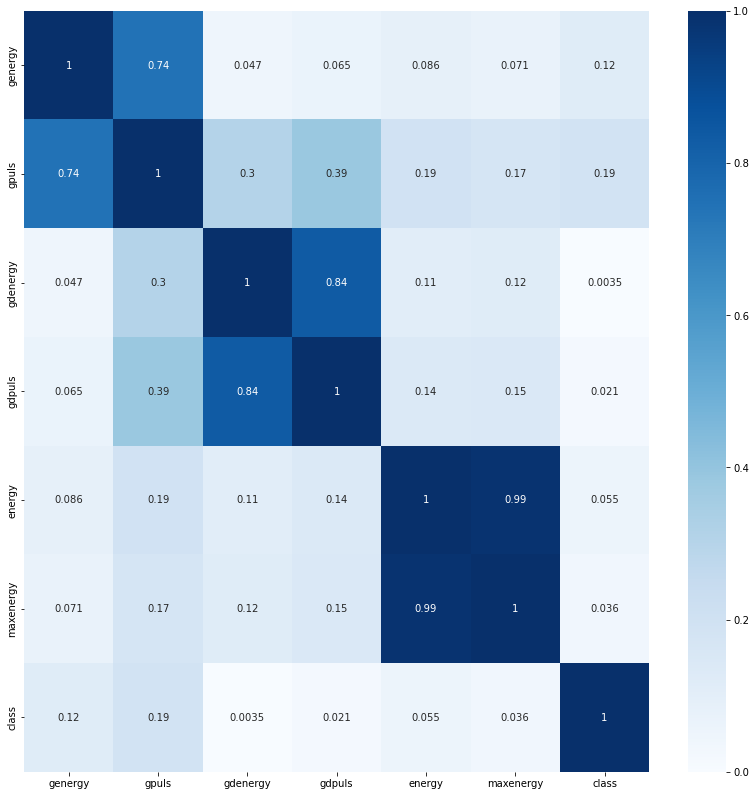

In [426]:
plt.figure(figsize=(14,14))
sns.heatmap(train.corr(), vmin=0, vmax=1, annot=True, cmap='Blues');

### V.4.b. Korelasi Kolom Kategorikal

In [427]:
cat_cols = train.select_dtypes(include=['object']).columns.to_list()
cat_chi2 = train[cat_cols]

cat_corr = SelectKBest(score_func=chi2, k=4)
cat_corr.fit(cat_chi2, train['class'])
cat_corr.scores_
np.round(cat_corr.scores_)

chi = pd.Series(cat_corr.scores_)
chi.index = cat_chi2.columns
chi.sort_values(ascending=False)

nbumps            273.662165
nbumps3           141.972609
nbumps2           125.663544
shift              10.671143
seismic             8.278329
nbumps4             7.989644
hazard              1.544010
nbumps5             0.302934
seismoacoustic      0.004231
dtype: float64

Fitur yang akan digunakan pada proses pembuatan model dipilih berdasarkan nilai korelasi untuk kolom numerik dan perhitungan chi-square untuk kolom kategorikal. Kolom-kolom dengan nilai korelasi atau chi-square yang rendah akan dihapus karena tidak digunakan, kolom-kolom tersebut adalah gdenergy, gdpuls, energy, maxenergy, seismoacoustic dan nbumps5.

In [428]:
train.drop(columns=['gdenergy', 'gdpuls', 'energy', 'maxenergy', 'seismoacoustic', 'nbumps5'], inplace=True)
test.drop(columns=['gdenergy', 'gdpuls', 'energy', 'maxenergy', 'seismoacoustic', 'nbumps5'], inplace=True)
train

,seismic,shift,genergy,gpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,class
1048,0,0,1620,11,0,0,0,0,0,0
622,0,1,45350,469,0,4,1,3,0,0
729,0,0,4610,78,0,0,0,0,0,0
1689,0,0,135210,3261,1,2,0,1,0,0
456,0,0,6530,38,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1422,0,0,5030,125,0,0,0,0,0,0
989,0,0,1160,20,0,0,0,0,0,0
1583,0,0,17390,720,0,0,0,0,0,0
2154,1,1,10220,408,0,0,0,0,0,0


## V.5. Handling Outliers

Dari feature yang sudah terpilih diatas, kita masih memiliki 2 kolom dengan tipe numerik, sehingga perlu dilakukan pengecekan dan handling outlier terlebih dahulu pada data train.

In [429]:
# fungsi untuk menampilkan histogram dan boxplot

def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

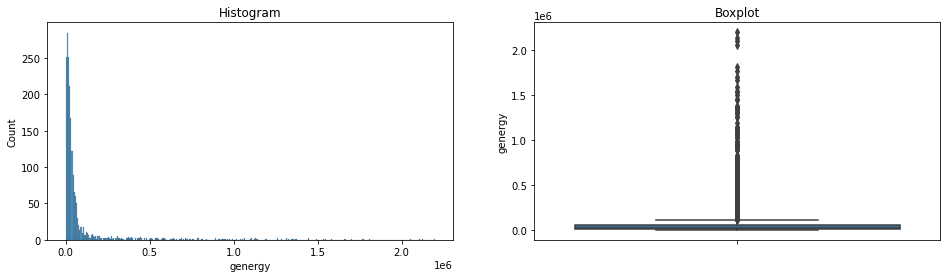


Nilai Skewness:  4.7863065031439


In [430]:
diagnostic_plots(train, 'genergy')
print('\nNilai Skewness: ', train['genergy'].skew())

Distribusi data kolom genergy ini termasuk extreme skew dengan nilai skewness sebesar 4.8 dan juga ditemukan adanya outliers. Untuk handling outliernya nanti akan digunakan metode Tukey's Rule dengan konstanta 3.

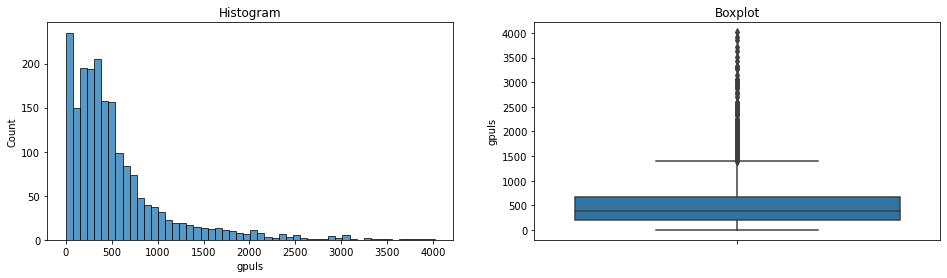


Nilai Skewness:  2.3642059837814684


In [431]:
diagnostic_plots(train, 'gpuls')
print('\nNilai Skewness: ', train['gpuls'].skew())

Distribusi data kolom gpuls ini termasuk extreme skew dengan nilai skewness sebesar 2.4 dan juga ditemukan adanya outliers. Untuk handling outliernya nanti akan digunakan metode Tukey's Rule dengan konstanta 3.

In [432]:
# fungsi untuk mencari batas atas dan bawah untuk outliers

def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    skew_lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    skew_upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return skew_lower_bound, skew_upper_bound

In [433]:
skew_lower_bound, skew_upper_bound = find_skew_bound(train, 'genergy', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah genergy:',skew_lower_bound)
print('Batas atas genergy:',skew_upper_bound)
print('')
print('Outliers bawah genergy : {}'.format(len(train[train['genergy'] < skew_lower_bound])))
print('Outliers atas genergy : {}'.format(len(train[train['genergy'] > skew_upper_bound])))

Batas bawah genergy: -113570.0
Batas atas genergy: 179905.0

Outliers bawah genergy : 0
Outliers atas genergy : 198


In [434]:
skew_lower_bound, skew_upper_bound = find_skew_bound(train, 'gpuls', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah gpuls:',skew_lower_bound)
print('Batas atas gpuls:',skew_upper_bound)
print('')
print('Outliers bawah gpuls : {}'.format(len(train[train['gpuls'] < skew_lower_bound])))
print('Outliers atas gpuls : {}'.format(len(train[train['gpuls'] > skew_upper_bound])))

Batas bawah gpuls: -1245.0
Batas atas gpuls: 2120.25

Outliers bawah gpuls : 0
Outliers atas gpuls : 50


In [435]:
capper = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['genergy', 'gpuls'])
capper.fit(train)

train_clean = capper.transform(train)
test_clean = capper.transform(test)

In [436]:
print('train - Sebelum Capping')
print(train[['genergy', 'gpuls']].describe())
print('')
print('train - Setelah Capping')
print(train_clean[['genergy', 'gpuls']].describe())

train - Sebelum Capping
            genergy        gpuls
count  1.934000e+03  1934.000000
mean   9.387403e+04   546.175801
std    2.325839e+05   563.930053
min    1.000000e+02     2.000000
25%    1.220500e+04   197.250000
50%    2.580500e+04   383.000000
75%    5.413000e+04   678.000000
max    2.196220e+06  4014.000000

train - Setelah Capping
             genergy        gpuls
count    1934.000000  1934.000000
mean    47259.095140   528.964064
std     53846.921546   495.493632
min       100.000000     2.000000
25%     12205.000000   197.250000
50%     25805.000000   383.000000
75%     54130.000000   678.000000
max    179905.000000  2120.250000


Outliers pada kolom genergy dan gpuls sudah berhasil dihandling dengan menggunakan winsorizer, dapat dilihat dari perubahan nilai max sebelum dan sesudah handling.

In [437]:
X_train = train_clean.drop(columns='class')
y_train = train_clean['class']

X_test = test_clean.drop(columns='class')
y_test = test_clean['class']

## V.6. Pemisahan Kolom Kategorikal dan Numerikal

Dilakukan pemisahan kolom berdasarkan tipe kolomnya. Hal ini dilakukan karena tiap jenis kolom akan berbeda perlakuan/treatment yang dilakukan nantinya. Untuk kolom numerikal dilakukan feature scaling dan untuk kolom kategorikal dilakukan feature encoding.

In [438]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Kolom numerikal:', num_columns)
print('Kolom kategorikal:', cat_columns)

Kolom numerikal: ['genergy', 'gpuls']
Kolom kategorikal: ['seismic', 'shift', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4']


In [439]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## V.7. Feature Scaling

Dilakukan untuk kolom/feature dengan tipe numerikal. Tujuannya untuk menyamakan/menyeragamkan range masing-masing featurenya, agar model lebih mudah dalam mempelajari pola/pattern dari feature ini.

In [440]:
X_train_num

,genergy,gpuls
1048,1620.0,11.00
622,45350.0,469.00
729,4610.0,78.00
1689,135210.0,2120.25
456,6530.0,38.00
...,...,...
1422,5030.0,125.00
989,1160.0,20.00
1583,17390.0,720.00
2154,10220.0,408.00


In [441]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.0084536 , 0.00424879],
       [0.25166152, 0.22046501],
       [0.02508273, 0.03587867],
       ...,
       [0.09615973, 0.33895905],
       [0.0562832 , 0.19166765],
       [0.32957927, 0.48672253]])

## V.8. Penggabungan Kembali Kolom Numerikal dengan Kategorikal

Setelah masing-masing tipe kolom dilakukan treatment sesuai tipe kolomnya, maka selanjutnya kolom-kolom ini digabung kembali menjadi 1 dataframe seperti awal.

In [442]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.008453602513834433, 0.0042487902749911485, '0', ..., '0', '0',
        '0'],
       [0.2516615222046106, 0.22046500649120737, '0', ..., '1', '3', '0'],
       [0.02508272851144295, 0.03587867343325859, '0', ..., '0', '0',
        '0'],
       ...,
       [0.09615972859486666, 0.3389590463826272, '0', ..., '0', '0', '0'],
       [0.05628319568421345, 0.19166765018293402, '1', ..., '0', '0',
        '0'],
       [0.3295792664275187, 0.48672253039065266, '1', ..., '1', '1', '0']],
      dtype=object)

In [443]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8
0,0.008454,0.004249,0,0,0,0,0,0,0
1,0.251662,0.220465,0,1,0,4,1,3,0
2,0.025083,0.035879,0,0,0,0,0,0,0
3,0.751425,1.0,0,0,1,2,0,1,0
4,0.035761,0.016995,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1929,0.027419,0.058067,0,0,0,0,0,0,0
1930,0.005895,0.008498,0,0,0,0,0,0,0
1931,0.09616,0.338959,0,0,0,0,0,0,0
1932,0.056283,0.191668,1,1,0,0,0,0,0


In [444]:
y_train

1048    0
622     0
729     0
1689    0
456     0
       ..
1422    0
989     0
1583    0
2154    0
2245    1
Name: class, Length: 1934, dtype: int64

## V.9. Handling Imbalance

Seperti yang diketahui dari proses EDA di atas bahwa kolom target yang dimiliki termasuk kedalam extreme imbalance dengan proporsi 93% dan 7%. Perlu dilakukan handling imbalance terlebih dahulu agar model bisa mempelajari data minoritas dengan lebih baik. 

In [445]:
ros = RandomOverSampler(random_state = 42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

0    1807
1    1807
Name: class, dtype: int64

In [446]:
X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_train_balanced_df

,0,1,2,3,4,5,6,7,8
0,0.008454,0.004249,0,0,0,0,0,0,0
1,0.251662,0.220465,0,1,0,4,1,3,0
2,0.025083,0.035879,0,0,0,0,0,0,0
3,0.751425,1.0,0,0,1,2,0,1,0
4,0.035761,0.016995,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
3609,1.0,1.0,1,1,0,3,1,1,1
3610,0.332249,0.327629,0,1,0,2,1,1,0
3611,0.284364,0.444707,1,1,0,2,0,2,0
3612,0.115458,0.220937,1,1,0,0,0,0,0


# **VI. MODELLING**

Pada bagian ini, penulis akan mencoba membuat beberapa model untuk melihat model mana yang memiliki performa terbaik untuk data ini. Model yang dibuat adalah Logistic Regression, Support Vector Machine, Random Forest, dan Gradient Boosting.

## VI.1. LOGISTIC REGRESSION

### VI.1.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [447]:
log_model = LogisticRegression(random_state=42)

### VI.1.b. MODEL TRAINING

In [448]:
log_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

### VI.1.c. MODEL EVALUATION

In [449]:
kfold = KFold(n_splits=10)
log_train_cross_val = cross_val_score(log_model, X_train_balanced, y_train_balanced, cv=kfold, scoring='accuracy')
log_test_cross_val = cross_val_score(log_model, X_test_final, y_test, cv=kfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(log_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(log_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(log_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(log_test_cross_val)))

Train Mean Accuracy: 0.680 | Train Std Accuracy: 0.049
Test Mean Accuracy: 0.930  | Test Std Accuracy: 0.017


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1807
           1       0.75      0.68      0.71      1807

    accuracy                           0.73      3614
   macro avg       0.73      0.73      0.73      3614
weighted avg       0.73      0.73      0.73      3614



========== TEST ==========
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       602
           1       0.18      0.63      0.28        43

    accuracy                           0.79       645
   macro avg       0.57      0.71      0.58       645
weighted avg       0.92      0.79      0.83       645



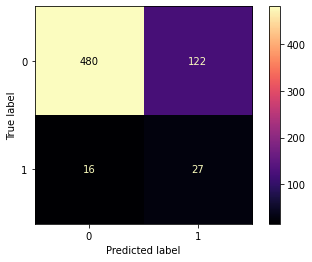

In [450]:
y_pred_train_log = log_model.predict(X_train_balanced)
y_pred_test_log = log_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train_balanced, y_pred_train_log, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_log, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Logistic Regression, didapatkan nilai recall sebesar 0.80 untuk label 0 (kejadian tidak berbahaya) dan 0.63 untuk label 1 (kejadian berbahaya). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh kejadian tidak berbahaya, model berhasil melakukan klasifikasi dengan tepat untuk 80% kejadian dan ada 20% kejadian tidak berbahaya yang salah klasifikasi menjadi kejadian berbahaya.
- Dari seluruh kejadian berbahaya, model hanya berhasil melakukan klasifikasi dengan tepat untuk 63% kejadian saja. Berarti ada 37% kejadian berbahaya yang diklasifikasi model sebagai kejadian tidak berbahaya.

## VI.2. SUPPORT VECTOR MACHINE (SVM)

### VI.2.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [451]:
svm_model = SVC(random_state=42)

### VI.2.b. MODEL TRAINING

In [452]:
svm_model.fit(X_train_balanced, y_train_balanced)

SVC(random_state=42)

### VI.2.c. MODEL EVALUATION

In [453]:
kfold = KFold(n_splits=10)
svm_train_cross_val = cross_val_score(svm_model, X_train_balanced, y_train_balanced, cv=kfold, scoring='accuracy')
svm_test_cross_val = cross_val_score(svm_model, X_test_final, y_test, cv=kfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(svm_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(svm_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(svm_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(svm_test_cross_val)))

Train Mean Accuracy: 0.707 | Train Std Accuracy: 0.031
Test Mean Accuracy: 0.933  | Test Std Accuracy: 0.018


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1807
           1       0.78      0.69      0.73      1807

    accuracy                           0.75      3614
   macro avg       0.75      0.75      0.75      3614
weighted avg       0.75      0.75      0.75      3614



========== TEST ==========
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       602
           1       0.19      0.56      0.28        43

    accuracy                           0.81       645
   macro avg       0.58      0.69      0.59       645
weighted avg       0.91      0.81      0.85       645



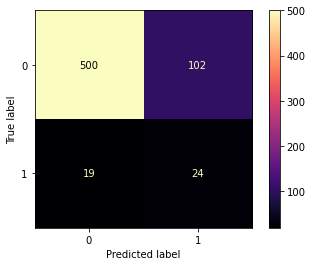

In [454]:
y_pred_train_svm = svm_model.predict(X_train_balanced)
y_pred_test_svm = svm_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train_balanced, y_pred_train_svm, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Support Vector Machine (SVM), didapatkan nilai recall sebesar 0.83 untuk label 0 (kejadian tidak berbahaya) dan 0.56 untuk label 1 (kejadian berbahaya). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh kejadian tidak berbahaya, model berhasil melakukan klasifikasi dengan tepat untuk 83% kejadian dan ada 17% kejadian tidak berbahaya yang salah klasifikasi menjadi kejadian berbahaya.
- Dari seluruh kejadian berbahaya, model hanya berhasil melakukan klasifikasi dengan tepat untuk 56% kejadian saja. Berarti ada 44% kejadian berbahaya yang diklasifikasi model sebagai kejadian tidak berbahaya.

## VI.3. RANDOM FOREST

### VI.3.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [455]:
rf_model = RandomForestClassifier(random_state=42)

### VI.3.b. MODEL TRAINING

In [456]:
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

### VI.3.c. MODEL EVALUATION

In [457]:
kfold = KFold(n_splits=10)
rf_train_cross_val = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=kfold, scoring='accuracy')
rf_test_cross_val = cross_val_score(rf_model, X_test_final, y_test, cv=kfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(rf_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(rf_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(rf_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(rf_test_cross_val)))

Train Mean Accuracy: 0.976 | Train Std Accuracy: 0.025
Test Mean Accuracy: 0.919  | Test Std Accuracy: 0.024


========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1807
           1       1.00      1.00      1.00      1807

    accuracy                           1.00      3614
   macro avg       1.00      1.00      1.00      3614
weighted avg       1.00      1.00      1.00      3614



========== TEST ==========
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       602
           1       0.12      0.07      0.09        43

    accuracy                           0.91       645
   macro avg       0.53      0.52      0.52       645
weighted avg       0.88      0.91      0.89       645



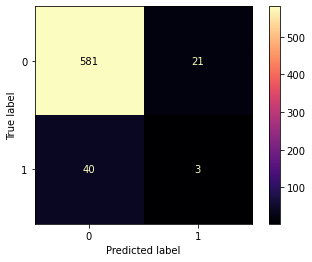

In [458]:
y_pred_train_rf = rf_model.predict(X_train_balanced)
y_pred_test_rf = rf_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train_balanced, y_pred_train_rf, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Random Forest, didapatkan nilai recall sebesar 0.97 untuk label 0 (kejadian tidak berbahaya) dan 0.07 untuk label 1 (kejadian berbahaya). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh kejadian tidak berbahaya, model berhasil melakukan klasifikasi dengan tepat untuk 97% kejadian dan ada 3% kejadian tidak berbahaya yang salah klasifikasi menjadi kejadian berbahaya.
- Dari seluruh kejadian berbahaya, model hanya berhasil melakukan klasifikasi dengan tepat untuk 7% kejadian saja. Berarti ada 93% kejadian berbahaya yang diklasifikasi model sebagai kejadian tidak berbahaya.

## VI.4. GRADIENT BOOSTING

### VI.4.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [459]:
gb_model = GradientBoostingClassifier(random_state=42)


### VI.4.b. MODEL TRAINING

In [460]:
gb_model.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(random_state=42)


### VI.4.c. MODEL EVALUATION

In [461]:
kfold = KFold(n_splits=10)
gb_train_cross_val = cross_val_score(gb_model, X_train_balanced, y_train_balanced, cv=kfold, scoring='accuracy')
gb_test_cross_val = cross_val_score(gb_model, X_test_final, y_test, cv=kfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(gb_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(gb_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(gb_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(gb_test_cross_val)))

Train Mean Accuracy: 0.832 | Train Std Accuracy: 0.026
Test Mean Accuracy: 0.924  | Test Std Accuracy: 0.019


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1807
           1       0.86      0.89      0.87      1807

    accuracy                           0.87      3614
   macro avg       0.87      0.87      0.87      3614
weighted avg       0.87      0.87      0.87      3614



========== TEST ==========
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       602
           1       0.19      0.47      0.27        43

    accuracy                           0.83       645
   macro avg       0.57      0.66      0.59       645
weighted avg       0.91      0.83      0.86       645



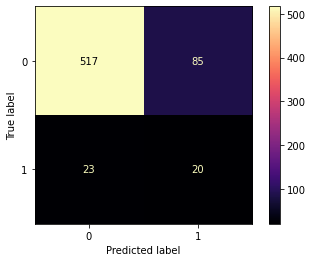

In [462]:
y_pred_train_gb = gb_model.predict(X_train_balanced)
y_pred_test_gb = gb_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train_balanced, y_pred_train_gb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_gb, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_gb, labels=gb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Gradient Boosting, didapatkan nilai recall sebesar 0.86 untuk label 0 (kejadian tidak berbahaya) dan 0.47 untuk label 1 (kejadian berbahaya). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh kejadian tidak berbahaya, model berhasil melakukan klasifikasi dengan tepat untuk 86% kejadian dan ada 14% kejadian tidak berbahaya yang salah klasifikasi menjadi kejadian berbahaya.
- Dari seluruh kejadian berbahaya, model hanya berhasil melakukan klasifikasi dengan tepat untuk 47% kejadian saja. Berarti ada 53% kejadian berbahaya yang diklasifikasi model sebagai kejadian tidak berbahaya.

## VI.5. MODEL OVERALL ANALYSIS

Disini penulis membuat sebanyak empat buah model dengan tujuan untuk mencari model mana yang performanya paling baik dalam melakukan prediksi terjadinya kejadian berbahaya (hazardous state). Metric yang akan menjadi patokan untuk pemilihan model terbaiknya adalah accuracy dan recall. Nilai accuracy disini digunakan sebagai ukuran performa sebuah model. Nilai recall menjadi metric yang penting dalam analisis kali ini, karena metric ini menunjukkan tingkat kesalahan klasifikasi atau yang sering disebut sebagai False Positive dan False Negative pada model.

Pada kasus kali ini sebagai pihak perusahaan tentu saja kita tidak ingin sampai terjadi salah prediksi kejadian. Ketika ada kejadian berbahaya namun kita prediksi sebagai kejadian tidak berbahaya (False Negatif) maka akan sangat fatal akibatnya bagi para pekerja yang berada di lokasi tambang, akibatnya bisa sampai menyebabkan para pekerja kita meninggal dunia. Tentu hal ini akan berdampak besar untuk perusahaan, pihak regulator pasti akan mempertanyakan standard HSE yang dimiliki perusahaan, dan bisa saja izin usaha perusahaan akan dicabut jika sampai terjadi kejadian yang merenggut nyawa para pekerja kita.

Kembali ke model yang sudah dibuat, berikut adalah nilai accuracy dan recall dari empat model:

| Model                  | Train Accuracy | Test Accuaracy | Recall 0 Test | Recall 1 Test |
| :---                   |    :---:       |      :---:     |     :---:     |    :---:      |
| Logistic Regression    | 0.73           | 0.79           | 0.80          | 0.63          |
| Support Vector Machine | 0.75           | 0.81           | 0.83          | 0.56          |
| Random Forest          | 1.00           | 0.91           | 0.97          | 0.07          |
| Gradient Boosting      | 0.87           | 0.83           | 0.86          | 0.47          |

Secara umum semua model yang dibuat memiliki nilai accuracy data train dan test yang sudah cukup baik, kecuali untuk model Random Forest ini cenderung overfit. Lalu walaupun sudah dilakukan handling imbalance pada data target, namun di semua model nilai recall untuk label 1 (kejadian berbahaya) masih lebih rendah apabila dibandingkan dengan nilai recall label 0 (kejadian tidak berbahaya).

Penulis memilih model **Logistic Regression** dan **SVM** sebagai model terbaik dibandingkan dengan model lainnya. Pemilihan model ini berdasarkan dari nilai recall untuk label 0 dan 1 yang cukup tinggi dibandingkan dengan dua model lainnya.

Selanjutnya model yang sudah dipilih ini akan dilakukan improvement dengan mencari hyperparameter yang tepat menggunakan bantuan fungsi GridSearchCV. Harapannya setelah dilakukan improvement performa model akan semakin baik dibandingkan dengan model dengan parameter default.

# **VII. MODEL IMPROVEMENT**

## HYPERPARAMETER TUNING WITH GRIDSEARCH

Hyperparameter tuning bertujuan untuk mencari hyperparameter apa saja yang paling optimal untuk model yang digunakan. Untuk membantu mencari hyperparameter yang paling optimal digunakan bantuan dari fungsi GridSearchCV. GridSearchCV merupakan salah satu metode hyperparameter yang cukup sering digunakan, pada dasarnya cara kerja GridSearchCV ini adalah menjalankan semua kemungkinan kombinasi hyperparameter ke dalam model yang dibuat. Oleh karena itu salah satu kelemahan dari GridSearchCV ini adalah running timenya cenderung lebih lama jika dibandingkan dengan metode hyperparameter yang lain.

## VII.1. LOGISTIC REGRESSION IMPROVEMENT

In [463]:
C = [0.4, 0.5, 0.6, 0.7]
solver = ['liblinear','lbfgs', 'saga']
max_iter = [500, 800, 1000, 1500]
lr_param_grid = {'penalty': ['l2'],
               'C': C,
               'solver': solver,
               'max_iter': max_iter,
               'random_state': [42]}
lr_param_grid

{'penalty': ['l2'],
 'C': [0.4, 0.5, 0.6, 0.7],
 'solver': ['liblinear', 'lbfgs', 'saga'],
 'max_iter': [500, 800, 1000, 1500],
 'random_state': [42]}

In [464]:
lr_gridcv = GridSearchCV(estimator=LogisticRegression(), 
                         param_grid=lr_param_grid,
                         cv=5,  
                         n_jobs=-1)
lr_gridcv.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.4, 0.5, 0.6, 0.7],
                         'max_iter': [500, 800, 1000, 1500], 'penalty': ['l2'],
                         'random_state': [42],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [465]:
lr_gridcv.best_params_

{'C': 0.5,
 'max_iter': 500,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear'}

In [466]:
lr_gridcv_best = lr_gridcv.best_estimator_

Accuracy - Before: 0.786046511627907
Accuracy - After: 0.7844961240310078
========== TEST-BEFORE ==========
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       602
           1       0.18      0.63      0.28        43

    accuracy                           0.79       645
   macro avg       0.57      0.71      0.58       645
weighted avg       0.92      0.79      0.83       645

========== TEST-AFTER ==========
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       602
           1       0.18      0.63      0.28        43

    accuracy                           0.78       645
   macro avg       0.57      0.71      0.58       645
weighted avg       0.92      0.78      0.83       645



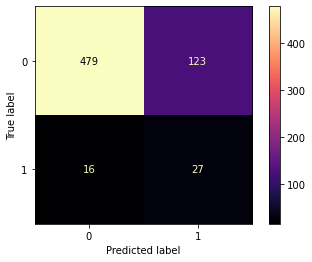

In [467]:
y_pred_test_best_lr = lr_gridcv_best.predict(X_test_final)
print('Accuracy - Before:', accuracy_score(y_test, y_pred_test_log))
print('Accuracy - After:', accuracy_score(y_test, y_pred_test_best_lr))

print("="*10,"TEST-BEFORE","="*10)
print(classification_report(y_test, y_pred_test_log, zero_division=0))
print("="*10,"TEST-AFTER","="*10)
print(classification_report(y_test, y_pred_test_best_lr, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_best_lr, labels=lr_gridcv_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_gridcv_best.classes_)

disp.plot(cmap='magma')
plt.show()

## VII.2. SUPPORT VECTOR MACHINE IMPROVEMENT

In [468]:
C = [0.1, 0.2, 0.3]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
max_iter = [1000, 1500]
svm_param_grid = {'C': C,
                  'kernel': kernel,
                  'gamma': gamma,
                  'max_iter': max_iter,
                  'random_state': [42]}
svm_param_grid

{'C': [0.1, 0.2, 0.3],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 'auto'],
 'max_iter': [1000, 1500],
 'random_state': [42]}

In [484]:
simplefilter("ignore", category=ConvergenceWarning)

svm_gridcv = GridSearchCV(estimator=SVC(), 
                         param_grid=svm_param_grid,
                         cv=5,  
                         n_jobs=-1)
svm_gridcv.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [1000, 1500], 'random_state': [42]})

In [470]:
svm_gridcv.best_params_

{'C': 0.3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 1500,
 'random_state': 42}

In [471]:
svm_gridcv_best = svm_gridcv.best_estimator_

Accuracy - Before: 0.8124031007751938
Accuracy - After: 0.8155038759689922
========== TEST-BEFORE ==========
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       602
           1       0.19      0.56      0.28        43

    accuracy                           0.81       645
   macro avg       0.58      0.69      0.59       645
weighted avg       0.91      0.81      0.85       645

========== TEST-AFTER ==========
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       602
           1       0.21      0.63      0.31        43

    accuracy                           0.82       645
   macro avg       0.59      0.73      0.60       645
weighted avg       0.92      0.82      0.85       645



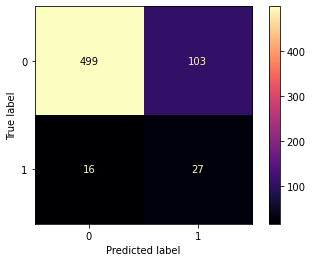

In [472]:
y_pred_test_best_svm = svm_gridcv_best.predict(X_test_final)
print('Accuracy - Before:', accuracy_score(y_test, y_pred_test_svm))
print('Accuracy - After:', accuracy_score(y_test, y_pred_test_best_svm))

print("="*10,"TEST-BEFORE","="*10)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))
print("="*10,"TEST-AFTER","="*10)
print(classification_report(y_test, y_pred_test_best_svm, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_best_svm, labels=svm_gridcv_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_gridcv_best.classes_)

disp.plot(cmap='magma')
plt.show()

Hasil dari model improvement menggunakan GridSearchCV:

| Model                  | Accuracy    | Recall 0    | Recall 1    |
|  :---                  |  :----:     |    :----:   |   :----:    |
| Logistic Regression    | 0.79 > 0.78 | 0.80 > 0.80 | 0.63 > 0.63 |
| Support Vector Machine | 0.81 > 0.82 | 0.83 > 0.83 | 0.56 > 0.63 |

Setelah dilakukan improvement dengan melakukan hyperparameter tuning menggunakan GridSearchCV, untuk model Logistic Regression tidak mengalami kenaikan performa sama sekali, malah untuk nilai accuracy-nya turun sedikit. Hal yang berbeda kita temukan pada model SVM, disini untuk nilai accuracy-nya naik walaupun hanya 1%, namun untuk nilai recall label 1 dimana ini adalah false negatif mengalami kenaikan yang cukup sigifikan sekitar 7%. Jadi untuk model terbaik yang didapatkan pada hasil analisis kali ini adalah model **Support Vector Machine (SVM)**.

# **VIII. MODEL INFERENCE USING PIPELINE**

Pada section ini akan dicoba untuk model memprediksi data inference atau data baru yang belum pernah dilihat sebelumnya.

In [473]:
data_inf

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,5280,178,-29,-16,0,0,0,0,0,0,0,0,0
1,1,0,1,38170,784,-27,12,0,3,1,2,0,0,3500,2000,0
2,1,0,0,10020,370,0,6,0,0,0,0,0,0,0,0,0
3,1,0,1,292040,1233,-33,-29,0,0,0,0,0,0,0,0,0
4,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0


In [474]:
num_col = X_train_num.columns.values

num_pipe = Pipeline([
    ('outlier', capper),
    ('scaling', scaler)
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_col)
])

pipe = Pipeline([('preprocessing', preprocess), ('classifier', svm_gridcv_best)], memory='cache_folder')

In [475]:
pipe.fit(X_train, y_train)

Pipeline(memory='cache_folder',
         steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['genergy',
                                                                                         'gpuls'])),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['genergy', 'gpuls'], dtype=object))])),
                ('classifier', SVC(C=0.3, max_iter=1500, random_state=42))])

In [476]:
pred_inf = pipe.predict(data_inf)
pred_inf_df = pd.DataFrame(pred_inf, columns=['Predicted Hazardous State'])
pred_inf_df

,Predicted Hazardous State
0,0
1,0
2,0
3,0
4,0


In [2]:
pd.concat([data_inf, pred_inf_df], axis=1)

NameError: name 'pd' is not defined

Dilakukan pengujian ulang pada model menggunakan data inference/data baru yang belum pernah dilihat oleh model sebelumnya. Kita ingin melihat apakah model mampu melakukan klasifikasi untuk data baru ini. Disini model berhasil melakukan klasifikasi pada data baru.

# **IX. MODEL SAVING**

In [478]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

# **IX. CONCLUSIONS**

Penulis sudah berhasil membuat beberapa model machine learning yang bertujuan untuk membantu perusahaan dalam melakukan prediksi kejadian berbahaya dan tidak berbahaya pada lokasi tambang. Dari beberapa model ini ingin dilihat model mana yang paling bagus ketepatannya dalam melakukan prediksi kejadian tersebut, karena dari sisi perusahaan akan sangat fatal dampaknya apabila model salah melakukan prediksi, terutama untuk false negative atau kejadian berbahaya yang diprediksi sebagai kejadian tidak berbahaya. Ini efeknya akan sangat fatal untuk para pekerja kita di lokasi karena resikonya sampai meninggal dunia, dan tidak hanya itu perusahaan juga terancam dicabut izin usahanya jika sampai jatuh korban di lokasi pertambangan akibat dari salah prediksi kejadian berbahaya ini.

Penulis memilih model Support Vector Machine (SVM) sebagai model yang paling baik performanya/ketepatannya dalam melakukan prediksi kejadian berbahaya. Keputusan ini didasarkan oleh nilai accuracy dan recall dari setiap model. Nilai accuracy sebagai acuan dari performa model yang dibuat. Nilai recall digunakan sebagai acuan dari ketepatan model dalam melakukan prediksi kejadian berbahaya, dimana jika nilainya mendekati satu maka akan semakin tepat prediksinya. Model SVM ini memiliki nilai recall untuk kejadian tidak berbahaya sebesar 0.83 dan nilai recall untuk kejadian berbahaya sebesar 0.63. Atau bisa diartikan sebagai:
- Dari seluruh kejadian tidak berbahaya, model berhasil melakukan prediksi dengan tepat untuk 83% kejadian dan ada 17% kejadian tidak berbahaya yang salah prediksi menjadi kejadian berbahaya.
- Dari seluruh kejadian berbahaya, model hanya berhasil melakukan prediksi dengan tepat untuk 63% kejadian saja. Berarti masih ada 37% kejadian berbahaya yang diklasifikasi model sebagai kejadian tidak berbahaya.

Dari hasil diatas sebenarnya bisa dilihat bahwa model yang dibuat masih kurang bisa melakukan prediksi kejadian berbahaya dengan tepat. Resiko salah klasifikasinya masih cukup besar sampai di angka 37%. Jika model ini ingin segera digunakan mungkin masih harus dikombinasikan dengan sistem-sistem pencegahan kejadian berbahaya yang lain untuk mengurangi resiko salah prediksi yang akibatnya sangat fatal.

Tentu saja dalam analisis pembuatan model kali ini masih jauh dari kata sempurna, apalagi jika melihat performa model yang masih kurang baik dalam melakukan prediksi kejadian berbahaya atau dengan kata lain kurang bisa membantu perusahaan dalam upaya menjaga dan meningkatkan standard HSE. Ada beberapa saran yang mungkin dapat dilakukan kedepannya yaitu:
- Mencoba menggunakan model machine learning yang lain karena pada analisis kali ini hanya menggunakan empat buah model saja.
- Mencoba melakukan handling imbalance dengan metode lain yang tersedia, karena untuk metode RandomOverSampling kali ini hasilnya masih kurang memuaskan.

In [1]:
data_inf_df.info()

NameError: name 'data_inf' is not defined